Length of transformation array: 256


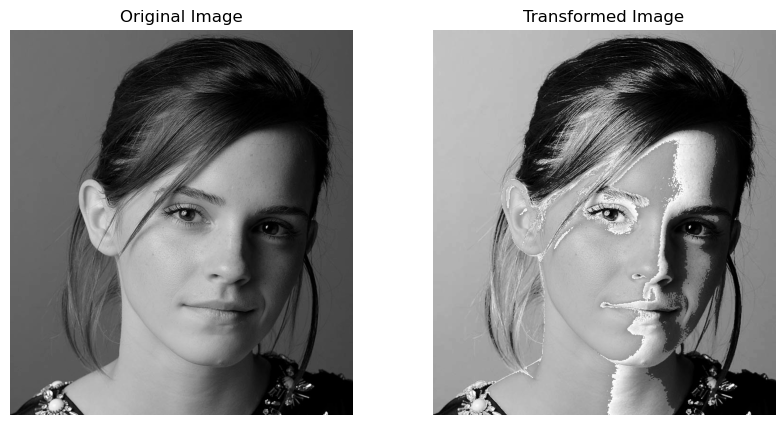

True

In [7]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Define the intensity transformation points based on the given function
# 0 to 50 -> 0 to 50, 50 to 150 -> 100 to 255, 150 to 255 -> 150 to 255
c = np.array([(50, 50), (150, 255)])

# Create the intensity transformation segments
t1 = np.linspace(0, c[0, 1], c[0, 0] + 1 - 0).astype('uint8')  # From 0 to 50, output from 0 to 50
t2 = np.linspace(100, c[1, 1], c[1, 0] - c[0, 0] - 1).astype('uint8')  # From 51 to 150, output from 100 to 255
t3 = np.linspace(150, 255, 255 - c[1, 0] + 1).astype('uint8')  # From 151 to 255, output from 150 to 255

# Concatenate the segments to form the full transformation array
transform = np.concatenate((t1, t2, t3), axis=0).astype('uint8')

# Fix the length of the transformation array to ensure it is exactly 256
if len(transform) > 256:
    transform = transform[:256]
elif len(transform) < 256:
    transform = np.pad(transform, (0, 256 - len(transform)), 'edge')

# Check the length of the transformation array (should be 256)
print(f"Length of transformation array: {len(transform)}")

# Load the grayscale image
img_orig = cv.imread('emma.jpg', cv.IMREAD_GRAYSCALE)
assert img_orig is not None, "Error: Image not found!"

# Apply the intensity transformation using cv.LUT
image_transformed = cv.LUT(img_orig, transform)

# Display the original and transformed images
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(img_orig, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(image_transformed, cmap='gray')
ax[1].set_title('Transformed Image')
ax[1].axis('off')

plt.show()

# Optionally, save the transformed image
cv.imwrite('transformed_emma.png', image_transformed)
